/tmp/ipykernel_406/816963700.py:20: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



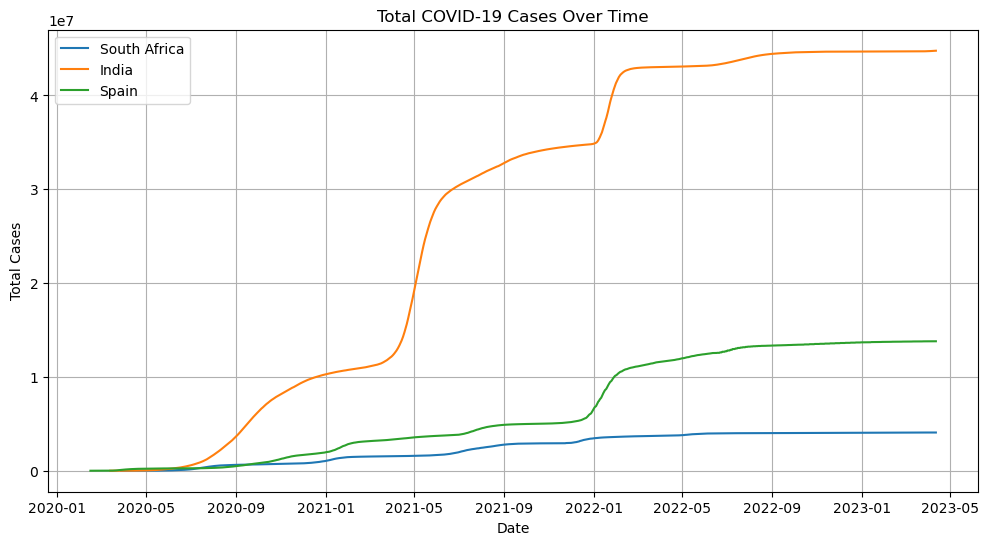

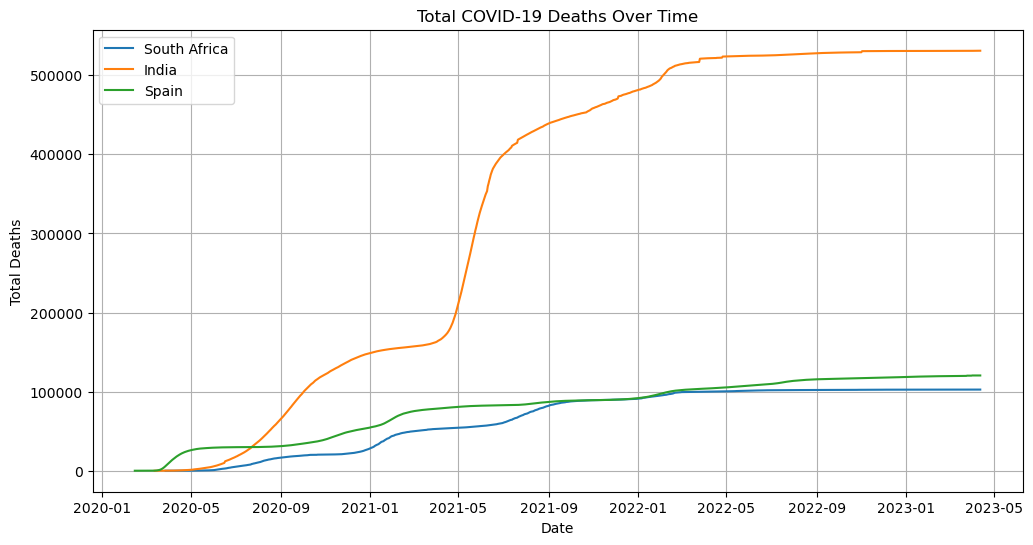

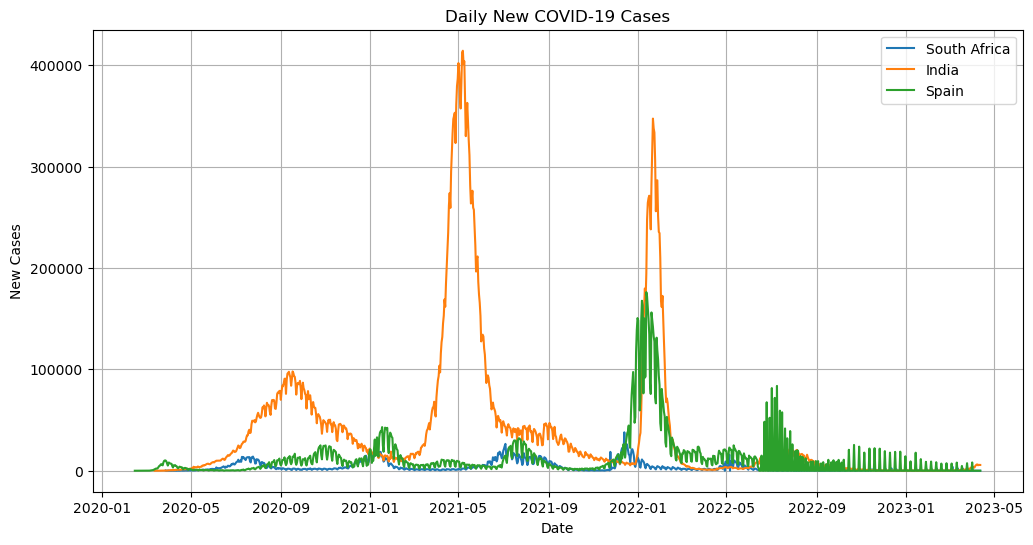

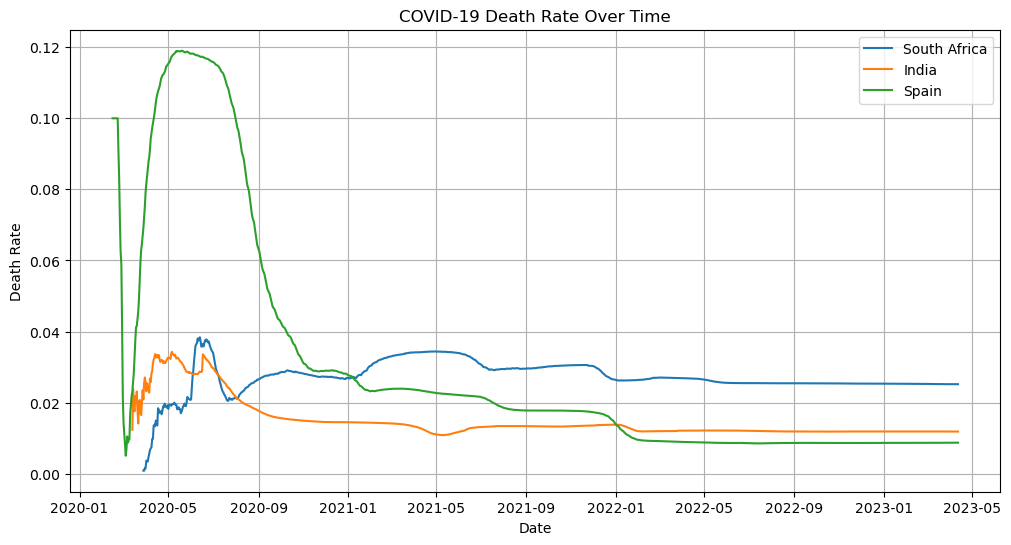

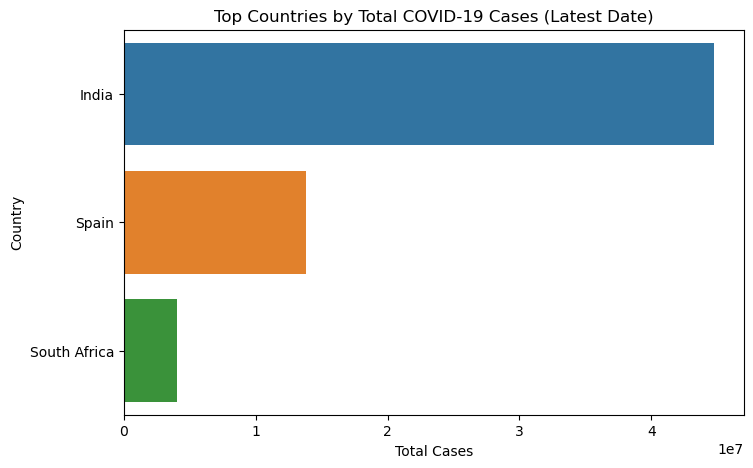

/tmp/ipykernel_406/816963700.py:86: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



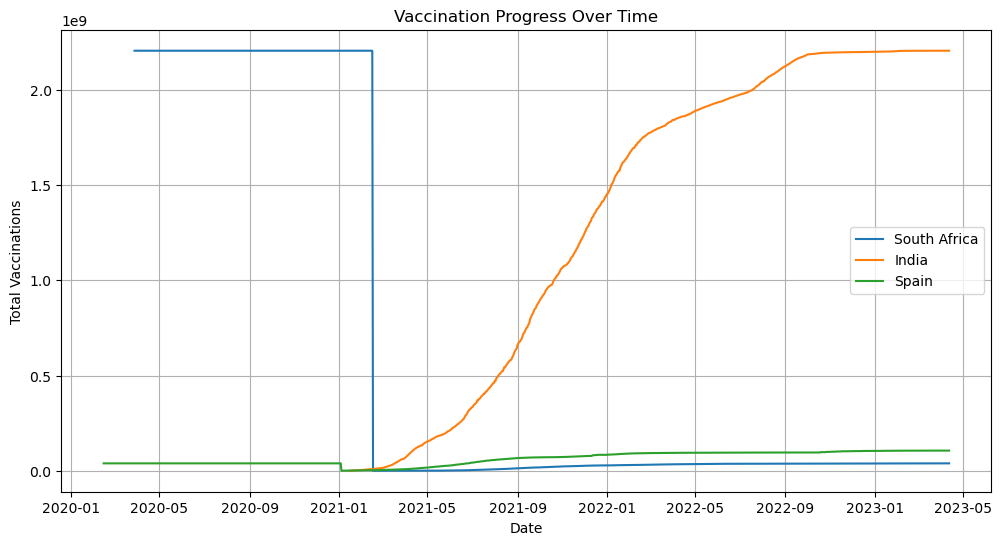

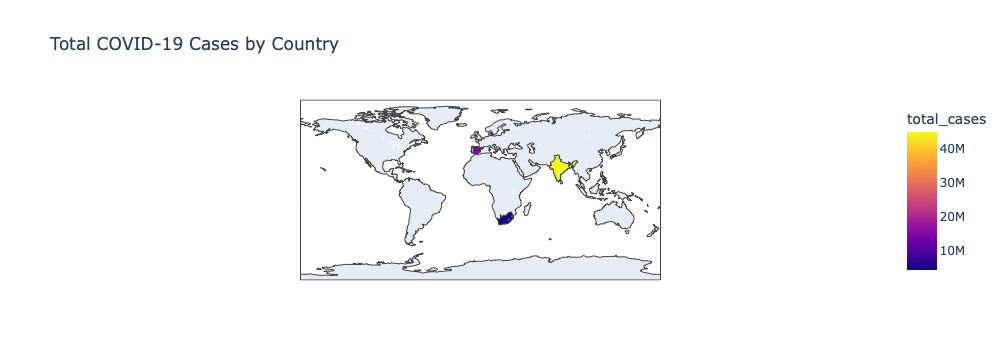

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 1: Load dataset
df = pd.read_csv('owid-covid-data.csv')

# Step 2: Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Step 3: Filter for selected countries
countries = ['South Africa', 'India', 'Spain']
df = df[df['location'].isin(countries)]

# Step 4: Drop rows with missing critical values
df = df.dropna(subset=['total_cases', 'total_deaths'])

# Step 5: Fill missing numeric values
df = df.fillna(method='ffill')

# Step 6: Plot total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

# Line chart: Total deaths over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

# Line chart: Daily new cases
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'].fillna(0), label=country)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show()

# Bar chart: Top countries by total cases (latest date)
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]
latest_df = latest_df.sort_values('total_cases', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='total_cases', y='location', data=latest_df)
plt.title('Top Countries by Total COVID-19 Cases (Latest Date)')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

# Step 7: Plot vaccination progress over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'].fillna(method='ffill'), label=country)
plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Create choropleth map (latest date)
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]

fig = px.choropleth(latest_df,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    title="Total COVID-19 Cases by Country")
fig.show()